In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [9]:
df_train = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_train.csv')
df_val = pd.read_csv('F:/Context_Aware_Data_Cleaning_Deep/SENTNOB/Dataset/sentnob_val.csv')

In [10]:
df_train

,Data,Label
0,মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...,1
1,এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...,2
2,ভাই আপনার কথাই যাদু রয়েছে,1
3,উওরটা আমার অনেক ভাল লেগেছে,1
4,আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...,0
...,...,...
12570,বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...,1
12571,আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...,2
12572,ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...,1
12573,বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...,2


In [11]:
df_train.groupby("Label").describe()

Data                                                               
      count unique                                                top freq
Label                                                                     
0      2894   2809  প্রেমেণ্ট ভিসা নিশ্চিত হওয়ার পরে , অগ্রীম কোনো...    3
1      5133   4986  আমি কাউকে শুধু ধন্যবাদ দিতে চাই না , এতটুকু বল...    3
2      4548   4350  কুত্তারবাচ্ছা , তোর জন্মই ত পতিতালয়ে । তা না হ...    3

In [12]:
def rem_symbol_punct(text):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', text)


def remove_html_and_urls(text):
    # Remove HTML tags
    soup = BeautifulSoup(text, "html.parser")
    text_without_html = soup.get_text()

    # Remove URLs
    text_without_urls = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text_without_html)

    return text_without_urls


def remove_emojis(text):
    # Emoji patterns for different Unicode ranges
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F700-\U0001F77F"  # Alphanumeric Supplement
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        "\U00002702-\U000027B0"  # Dingbat symbols
        "\U000024C2-\U0001F251" 
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r'', text)


#remove noise
def Remove_text(text):
    text = rem_symbol_punct(text)
    text = remove_html_and_urls(text)
    text = remove_emojis(text)
    return text

In [13]:
df_train['Data'] = df_train['Data'].apply(Remove_text)
df_val['Data'] = df_val['Data'].apply(Remove_text)

In [14]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


In [15]:
def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

In [16]:
df_train['Data'] = df_train['Data'].apply(remove_stopwords)
df_val['Data'] = df_val['Data'].apply(remove_stopwords)

In [17]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)

In [18]:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_val['Data'] = df_val['Data'].apply(apply_bangla_stemming)

applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied second rules..
applied fourth rules..

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [20]:
df_train['Label'] = df_train['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})
df_val['Label'] = df_val['Label'].replace({0: 'Neutral', 1: 'Positive', 2: 'Negative'})

In [21]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [22]:
df_train.columns

Index(['Data', 'Label'], dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_train["classes_bin"] = lb_make.fit_transform(df_train["Label"])
df_val["classes_bin"] = lb_make.fit_transform(df_val["Label"])
df_train[["classes_bin", "Label"]].head(11)

,classes_bin,Label
0,2,Positive
1,0,Negative
2,2,Positive
3,2,Positive
4,1,Neutral
5,1,Neutral
6,0,Negative
7,2,Positive
8,1,Neutral
9,1,Neutral


In [24]:
df_train

,Data,Label,classes_bin
0,মুগ্ধ হয় গেল মামু তোমায় কমু বলো তোমায় কোথায় পা...,Positive,2
1,কুত্ত বাচ্চা দেশ অবস্তায় তিন পুলিশ তরে মার পেল...,Negative,0
2,ভাই কথা যাদু রয়,Positive,2
3,উওর ভাল লাগ,Positive,2
4,গাড়ী সাজেক পারবো প্রাইভেট কার,Neutral,1
...,...,...,...
12570,বর্ডারে লেট হয় যাওয়াতে জিপে যাই বিকাল টার শিলি...,Positive,2
12571,সোন বাংলা রক্ষক নাম ভক্ষক জায়গা হবেনা মাননীয় প...,Negative,0
12572,ওনারা হাইজিনিক সুন্দর পরিবেশ রান্না বাসাবাড়ি ছ...,Positive,2
12573,বাংলাদেশ পুলিশ চাই ধরনে পুলিশ দরক,Negative,0


In [25]:
df_train.isnull()

,Data,Label,classes_bin
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
12570,False,False,False
12571,False,False,False
12572,False,False,False
12573,False,False,False


In [26]:
df_train.dropna(inplace=True)

In [27]:
text = df_train['Data'].values.tolist()

In [28]:
df_train.groupby("Label").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
Label                                                  
Negative      4548.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Neutral       2894.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
Positive      5133.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0

In [29]:
df_train["Label"].value_counts()

Positive    5133
Negative    4548
Neutral     2894
Name: Label, dtype: int64

In [30]:
df_train['Data'] = df_train['Data'].astype(str)
df_val['Data'] = df_val['Data'].astype(str)

In [31]:
train_text = df_train["Data"]

In [32]:
test_text= df_val["Data"]

In [33]:
train_counts = count_vect.fit_transform(train_text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(12575, 2834)

In [34]:
test_counts = count_vect.transform(test_text) # converting docs into vectors
test_tfidf  = test_counts 
test_tfidf = tfidf_transformer.transform(test_counts) # converting transformed vectors into tf-idf vectors
test_tfidf.shape

(1567, 2834)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train = train_tfidf
X_test = test_tfidf

y_train = df_train['classes_bin']
y_test = df_val["classes_bin"]

In [37]:
Y_pre = df_train['Label']
target_names = list(set(Y_pre))

In [38]:
target_names

['Negative', 'Positive', 'Neutral']

In [39]:
X_train

<12575x2834 sparse matrix of type '<class 'numpy.float64'>'
	with 56358 stored elements in Compressed Sparse Row format>

In [40]:
y_train

0        2
1        0
2        2
3        2
4        1
        ..
12570    2
12571    0
12572    2
12573    0
12574    0
Name: classes_bin, Length: 12575, dtype: int32

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [42]:
import seaborn as sn

# Naive Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.5552010210593491
              precision    recall  f1-score   support

    Negative       0.59      0.60      0.59       590
    Positive       0.52      0.07      0.12       354
     Neutral       0.54      0.79      0.64       623

    accuracy                           0.56      1567
   macro avg       0.55      0.49      0.45      1567
weighted avg       0.55      0.56      0.50      1567



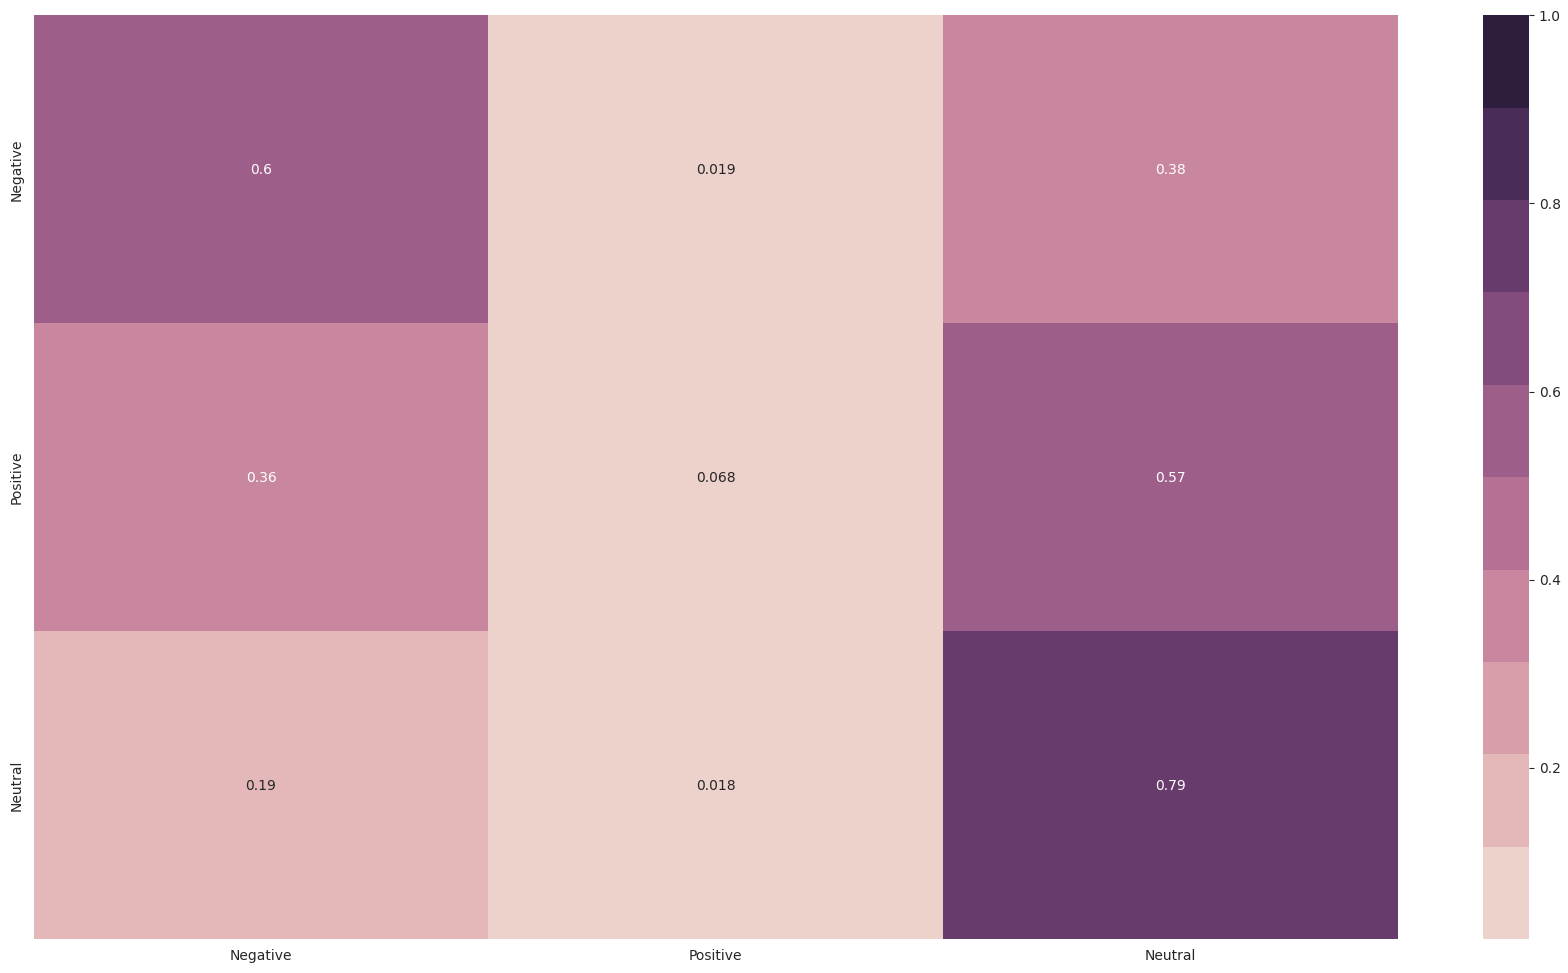

In [44]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

In [45]:
NBclassifer.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

# Support Vector Machine

In [46]:
from sklearn.svm import SVC


Test set accuracy 0.6043395022335674
              precision    recall  f1-score   support

    Negative       0.65      0.69      0.67       590
    Positive       0.47      0.27      0.34       354
     Neutral       0.61      0.71      0.66       623

    accuracy                           0.60      1567
   macro avg       0.57      0.56      0.56      1567
weighted avg       0.59      0.60      0.59      1567



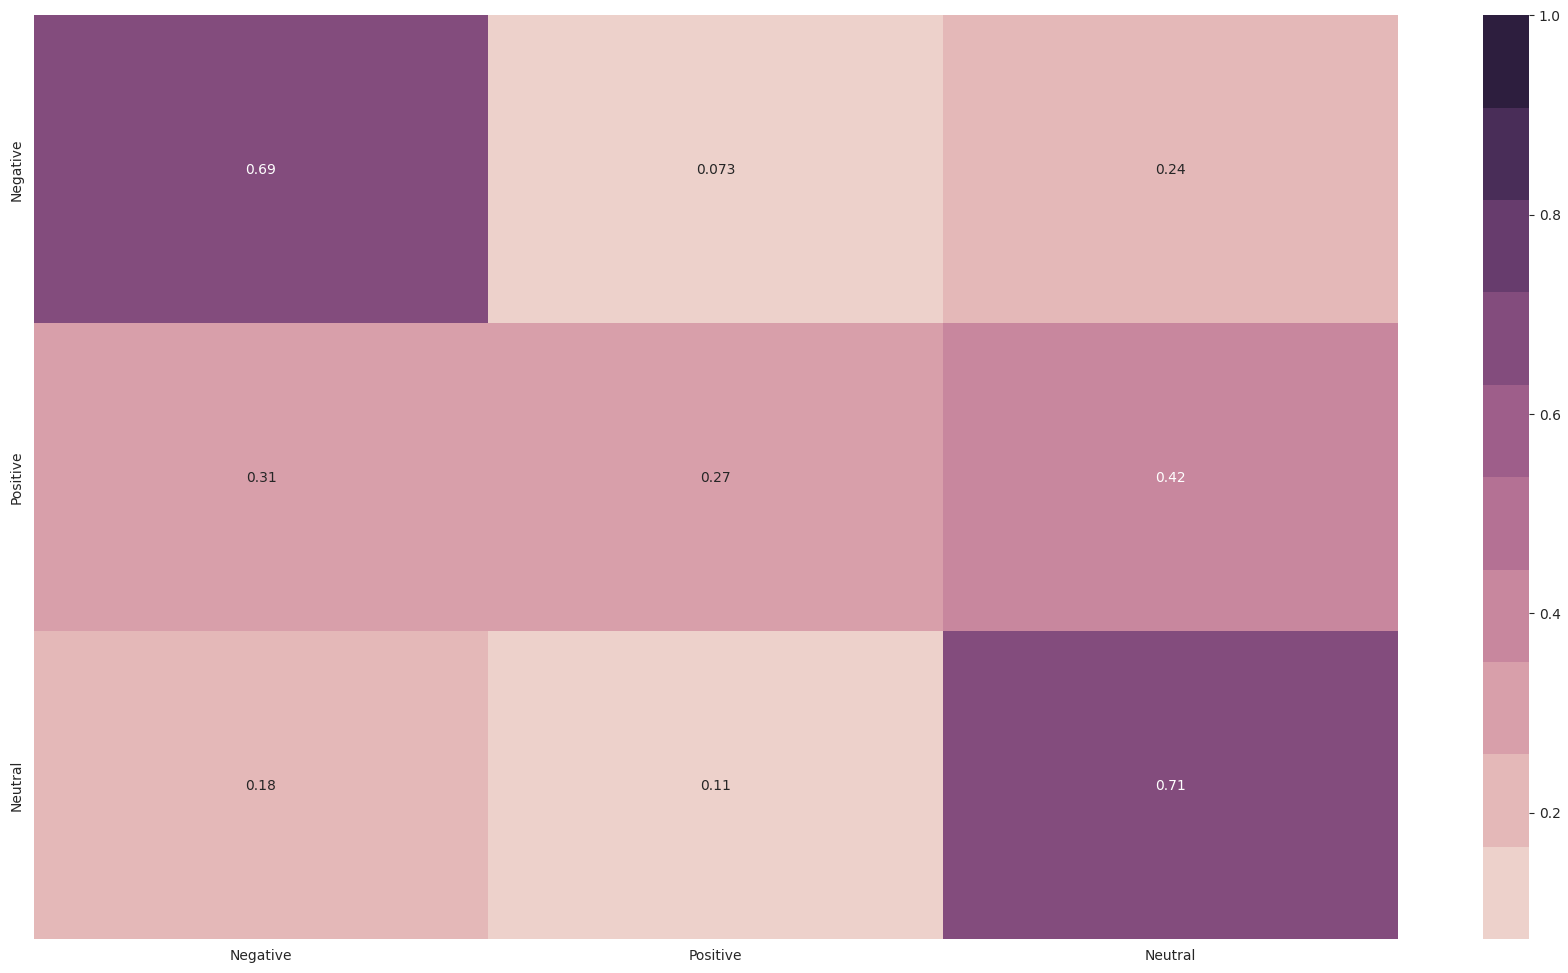

In [47]:
SVMclassifer = SVC()
SVMclassifer.fit(X_train, y_train)
y_pred = SVMclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

# XGBoost

In [48]:
from xgboost import XGBClassifier

Test set accuracy 0.5488194001276324
              precision    recall  f1-score   support

    Negative       0.53      0.69      0.60       590
    Positive       0.43      0.12      0.19       354
     Neutral       0.59      0.65      0.62       623

    accuracy                           0.55      1567
   macro avg       0.52      0.49      0.47      1567
weighted avg       0.53      0.55      0.52      1567



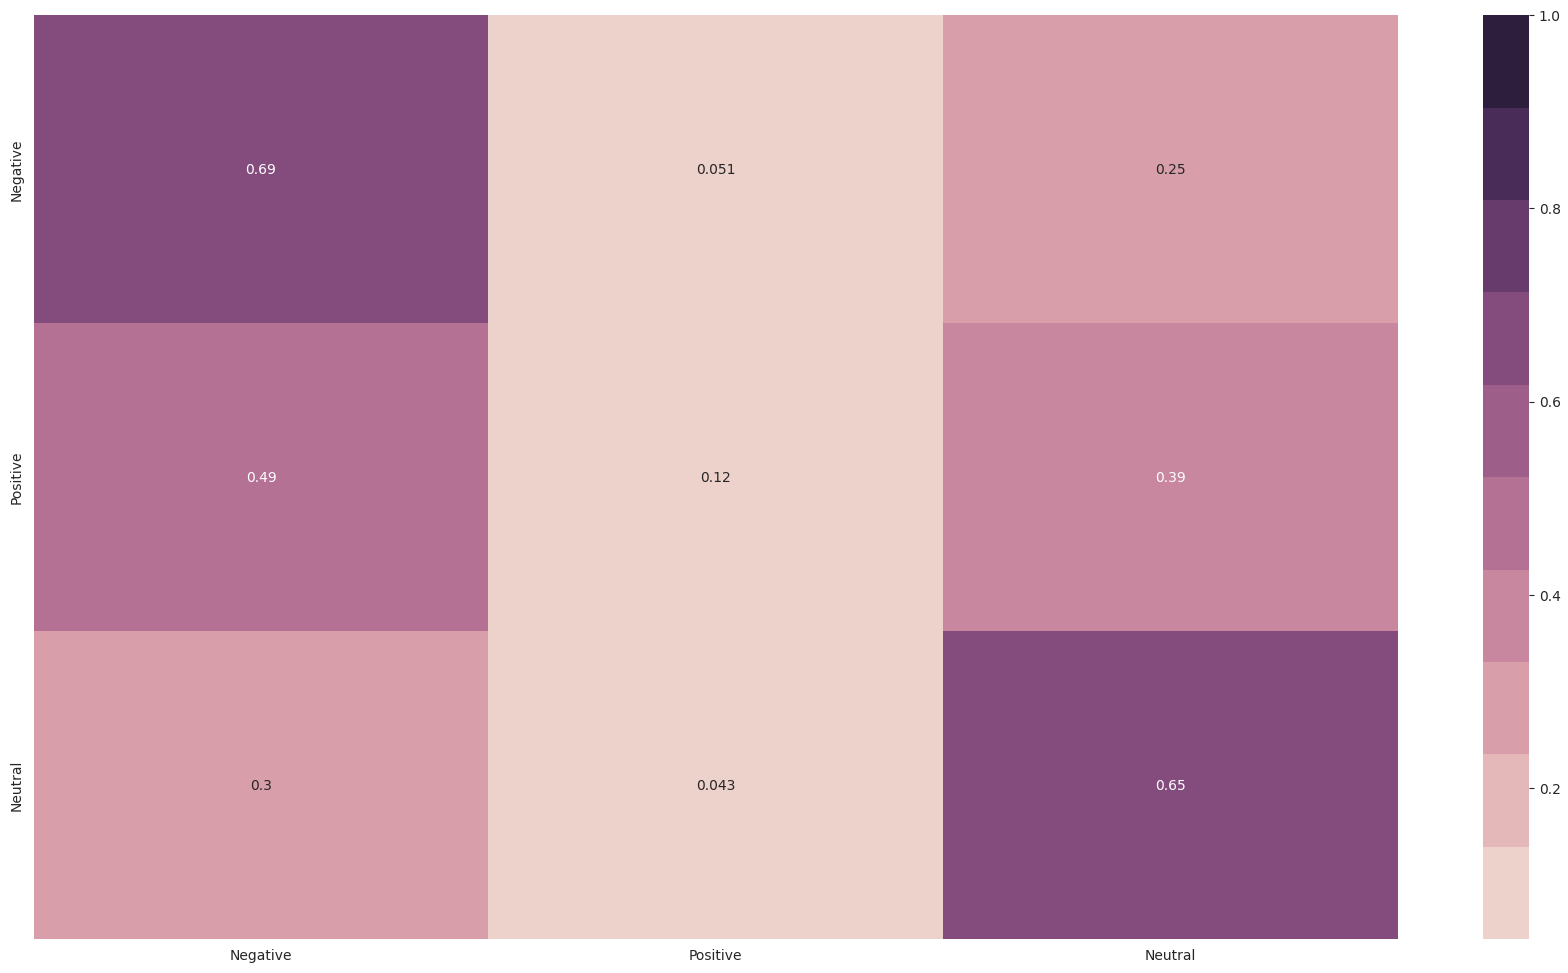

In [49]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.5998723675813656
              precision    recall  f1-score   support

    Negative       0.67      0.64      0.65       590
    Positive       0.43      0.35      0.38       354
     Neutral       0.61      0.71      0.66       623

    accuracy                           0.60      1567
   macro avg       0.57      0.56      0.56      1567
weighted avg       0.59      0.60      0.59      1567



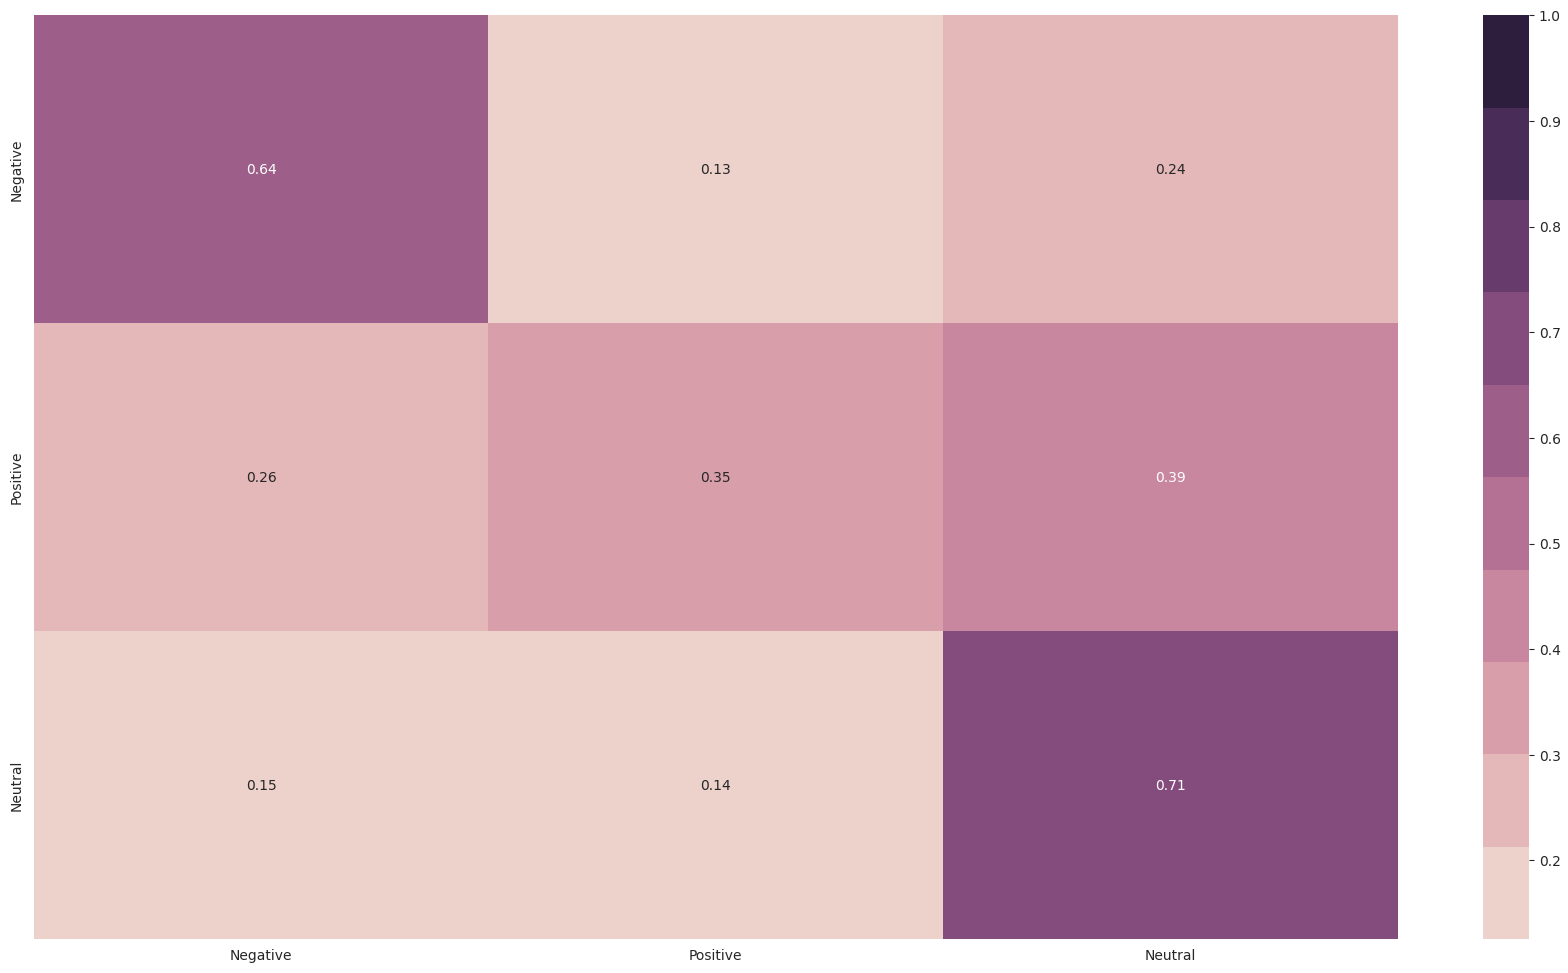

In [51]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  